# Project 4: Interest Point detection via Harris

The goal of this project is to implement the Harris Feature detector (described in lecture, in the textbook, and and in readings).

In each case, write your algorithm code in `project4.py`, and only use this notebook for testing.

## Part 1: Harris Feature Detector

Recall that the steps of Harris detection are, in a nutshell:

* Calculate the x derivative $I_{x}$ and the y  derivative $I_{y}$ of the image using a simple Sobel (3x3 window)
* Given those new derivative values (which are 2D arrays just like your image, calculate three new arrays: 
    * $I_{xx} = I_{x} * I_{x}$
    * $I_{xy} = I_{x} * I_{y}$
    * $I_{yy} = I_{y} * I_{y}$
    * (hint: these are very simple)
* Convolve each image above with a gaussian kernel (window 5), to produce new arrays 
    * $\langle I_{xx} \rangle$
    * $\langle I_{xy} \rangle$
    * $\langle I_{yy} \rangle$
* Now ,for every coordinate in your image, calculate the following structure tensor:

$
\begin{bmatrix}
\langle I_{xx} \rangle & \langle I_{xy} \rangle \\
\langle I_{yx} \rangle & \langle I_{yy} \rangle \\
\end{bmatrix}
$

* Now, for each pixel in your output image (same dimensions as your input image),  calculate:

$ R = Det(A) - k*Trace(A)^{2} $


(use k = 0.04)

* once you have your array of R values, threshold them to only keep values within 1% of the max R in your image.



In [1]:
import cv2
import math
import matplotlib.pyplot as plt
import numpy as np


### Harris Testing 

* This code will find interest points on the sample image from the slides and then draw red dots on top of the interest points. 

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


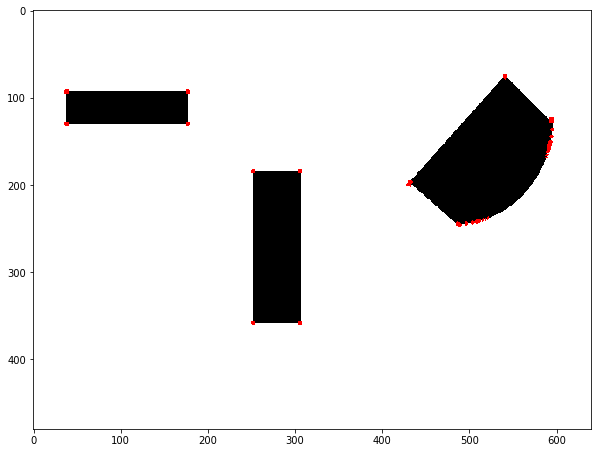

In [2]:

from project4 import *
plt.rcParams["figure.figsize"] = (10,20)

img = cv2.imread('testimage.pgm')
k = 0.04
Responses = HarrisDetector(img,k)
#print(img[Responses>0.01*Responses.max()])
print(Responses)
img[Responses>0.01*Responses.max()]=[255,0,0]
plt.imshow(img)
plt.show()

## Part 2: non-maximal suppression 

The results of your harris detector probably find way too many features, even for a simple test image.  To reduce the number, use the non-maximal suppression algorithm described in lecture, slides, and in the comments of `project4.py`.

The idea is to only detect features that are bothlocal maxima and whose response value is significantly (10%)   greater than that of all of its neighbors within a radius r.

[ 39 594 253 176 432 253 541 487 305 305  39 176] [ 94 127 357  94 197 185  76 245 185 357 129 129]


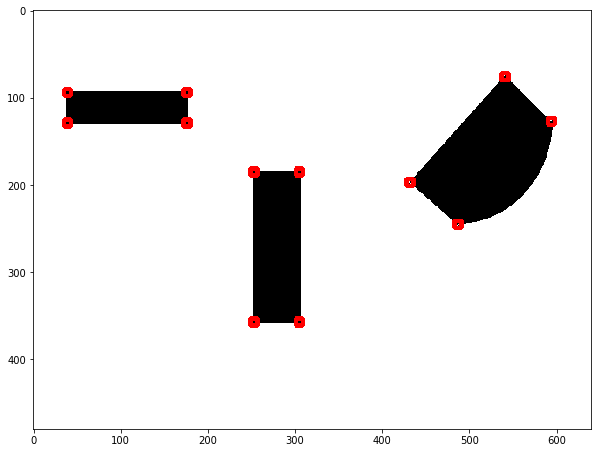

In [3]:
# write your own testing code below.
# modify as needed
# be sure to display your results somehow!  I recommend drawing boxes over keypoints.
nxtimg = cv2.imread('testimage.pgm')
xvals,yvals = SuppressNonMax(Responses,12)
plt.rcParams["figure.figsize"] = (10,20)
print(xvals, yvals)
for index in range(len(xvals)):
    cv2.rectangle(nxtimg, (xvals[index]-4, yvals[index]-4), (xvals[index]+4, yvals[index]+4), color=(255,0, 0), thickness=3)
plt.imshow(nxtimg)
plt.show()
#print(SuppressNonMax(Responses,20))

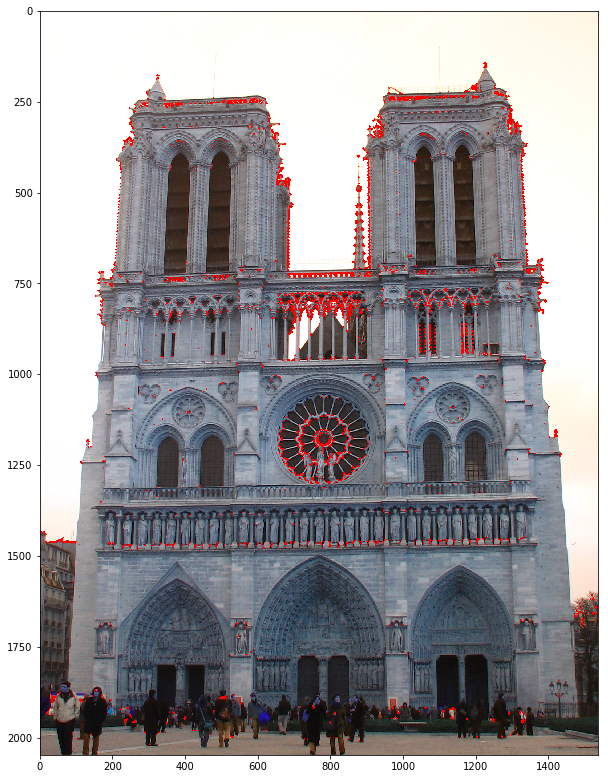

[ 694  237 1327   43  195 1342  940 1290  636 1472  727 1115 1434  972
  113  613   33  862  384  197  798 1111 1012 1226  667  855  398  321
 1388 1081  249 1173  356 1075  466  506  252  530  757  978  154  568
 1003  271 1032 1353  367 1145  167 1368] [ 823 1951 1958 1460  736  716  342  305  317 1664 1215 1461 1219 1683
 1242 1468 1886 1463  742 1693 1958 1926 1213  943  476  811 1947 1309
  962  770 1471 1291  255  926 1471  249  358 1998 1775 1944  995 1770
 1083 1053  239 1676  950  234 1350 1342]


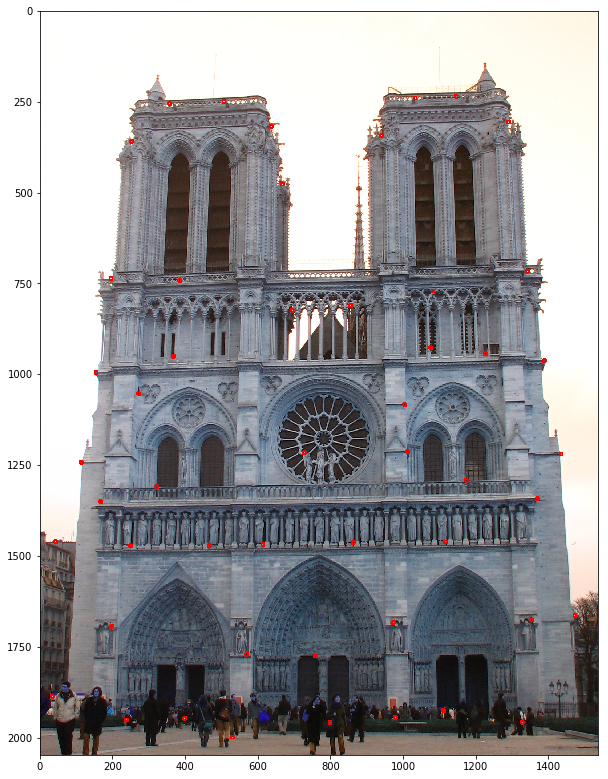

In [4]:
ndimg = cv2.imread('nd2.jpg')
k = 0.04
Responses2 = HarrisDetector(ndimg,k)
#print(img[Responses>0.01*Responses.max()])
#print(Responses2)
ndimg[Responses2>0.01*Responses2.max()]=[255,0,0]
plt.imshow(ndimg)
plt.show()

nd2img = cv2.imread('nd2.jpg')
xvals,yvals = SuppressNonMax(Responses2,50)
plt.rcParams["figure.figsize"] = (10,20)
print(xvals, yvals)
for index in range(len(xvals)):
    cv2.rectangle(nd2img, (xvals[index]-4, yvals[index]-4), (xvals[index]+4, yvals[index]+4), color=(255,0, 0), thickness=3)
plt.imshow(nd2img)
plt.show()

Write Up:
I used the sobel edge detector to find edges of the image and then multiplied the filtered edge magnitudes. Then I blurred the image to more easily find the intensity values between corners. I then calculated the determinant and the trace for every pixel in the image and placed them in the appropriate bin of the matrix. For the Non-Maximum Supression, I thresholded the list of Rvals in my by 10% of the maximum value and added the x, y coordinates as a list of tuples. I sorted the list of tuples by distance from greatest to smallest. Then I looped through each value in the list of tuples to calculate the cartesian distance. I added the distances to a list and found the minimum distances adding those minimum distances with their appropriate x,y coordinates to a new list of tuples. This was then sorted again from greatest to smallest and the top n values were taken to return the list of x, y coordinates.